# Graph Visualizer For Algorithms using CSV File

In [37]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D

In [93]:
plt.rcParams.update({'font.size': 16})

MDRRHA_SJS_FCFS = 0
ALGO_COMPARISONS_ATAT_BAR = 1
ALGO_COMPARISONS_ATAT_LINE = 2
ALGO_COMPARISONS_WT_BAR = 3
ALGO_COMPARISONS_WT_LINE = 4

# output_filename = "./../data/kaggle1/kaggle1_output.csv"
# output_filename = "./../data/kaggle2/kaggle2_output.csv"
output_filename = "./../data/random/random_AT_NZ_output.csv"
# output_filename = "./../data/drrha_2/drrha_2_output.csv"

## HRRNHA and NDRRHA Comparison

In [15]:
# Import Data from CSV file
dataset = pd.read_csv(
    output_filename, 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)


dataset = dataset.loc[dataset['name'].isin(['NDRRHA', 'HRRNHA'])]
dataset = dataset.loc[dataset['#cases'] >= 300]
# print(dataset)


<Figure size 432x288 with 0 Axes>

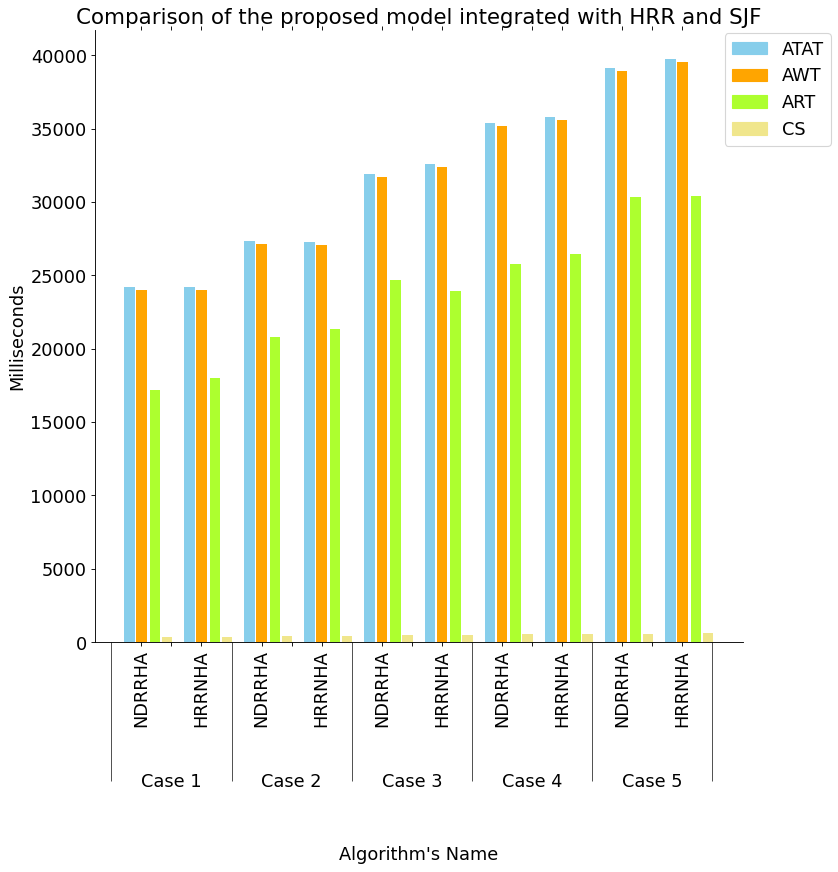

In [16]:
# Comparison of mDRRHA with SJF and FCFS

# Graph Configurations 
plt.figure(MDRRHA_SJS_FCFS)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['name'].to_numpy()
X_labels = []
X_axis = []
X_axis_lines = [0]
X_axis_bars = []

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    X_axis_bars.append(counter)

    counter += 1
    if push_empty:
        push_empty = False
        X_axis_lines.append(counter)
        counter += 1

    if i % 2 == 0:
        X_labels = np.append(X_labels, 'Case ' + str(current_case_index))
        current_case_index += 1
        X_axis.append(counter)
        counter += 1
        push_empty = True

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# vertical alignment of xtick labels
minor_axis_padding_up = -0.2
vertical_align = []
for i in range(0, len(X_labels)):
    valueToPush = 0
    if i % 3 == 1:
        valueToPush = minor_axis_padding_up      

    vertical_align.append(valueToPush)

# Adding Lines to xTicks
line_width = 0.025
line_height = 125

for i, (t, y) in enumerate(zip(ax.get_xticklabels(), vertical_align)):
    if i % 3 == 0 or i % 3 == 2:
        t.set_rotation(90)

    t.set_y(y)


ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

bar_width = 0.35
padding_betweenbars = 0.05

avgTAT_color = 'skyblue'
avgWT_color = 'orange'
avgRT_color = 'greenyellow'
nCS_color = 'khaki'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

avgTAT_values = dataset['avgTAT'].to_numpy()
avgWT_values = dataset['avgWT'].to_numpy()
avgRT_values = dataset['avgRT'].to_numpy()
avgNCS_values = dataset['nCS'].to_numpy()

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis_bars):
    ax.bar(
        x_axis - bar_width - padding_betweenbars, 
        avgTAT_values[current_bar_index], 
        bar_width, 
        label = 'ATAT',
        color = avgTAT_color
    )

    ax.bar(
        x_axis, 
        avgWT_values[current_bar_index], 
        bar_width, 
        label = 'AWT',
        color = avgWT_color
    )

    ax.bar(
        x_axis + 9 * padding_betweenbars, 
        avgRT_values[current_bar_index], 
        bar_width, 
        label = 'RT',
        color = avgRT_color
    )

    ax.bar(
        x_axis + bar_width + 10 * padding_betweenbars, 
        avgNCS_values[current_bar_index], 
        bar_width, 
        label = 'CS',
        color = nCS_color
    )

    current_bar_index += 1

# Configuring Legend
legend_elements = [
    Patch(facecolor=avgTAT_color, edgecolor=avgTAT_color, label='ATAT'),
    Patch(facecolor=avgWT_color, edgecolor=avgWT_color, label='AWT'),
    Patch(facecolor=avgRT_color, edgecolor=avgRT_color, label='ART'),
    Patch(facecolor=nCS_color, edgecolor=nCS_color, label='CS')
]

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.15, 1.01)
)

plt.xlabel('Algorithm\'s Name', labelpad = 50)
plt.ylabel('Milliseconds')
plt.title('Comparison of the proposed model integrated with HRR and SJF')
# plt.legend()
plt.show()


## Bar Graph Comparison for Small Dataset

In [72]:
# Import Data from CSV file
dataset = pd.read_csv(
    output_filename, 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

dataset = dataset.loc[dataset['name'] != 'HRRNHA']
# print(dataset)


<Figure size 432x288 with 0 Axes>

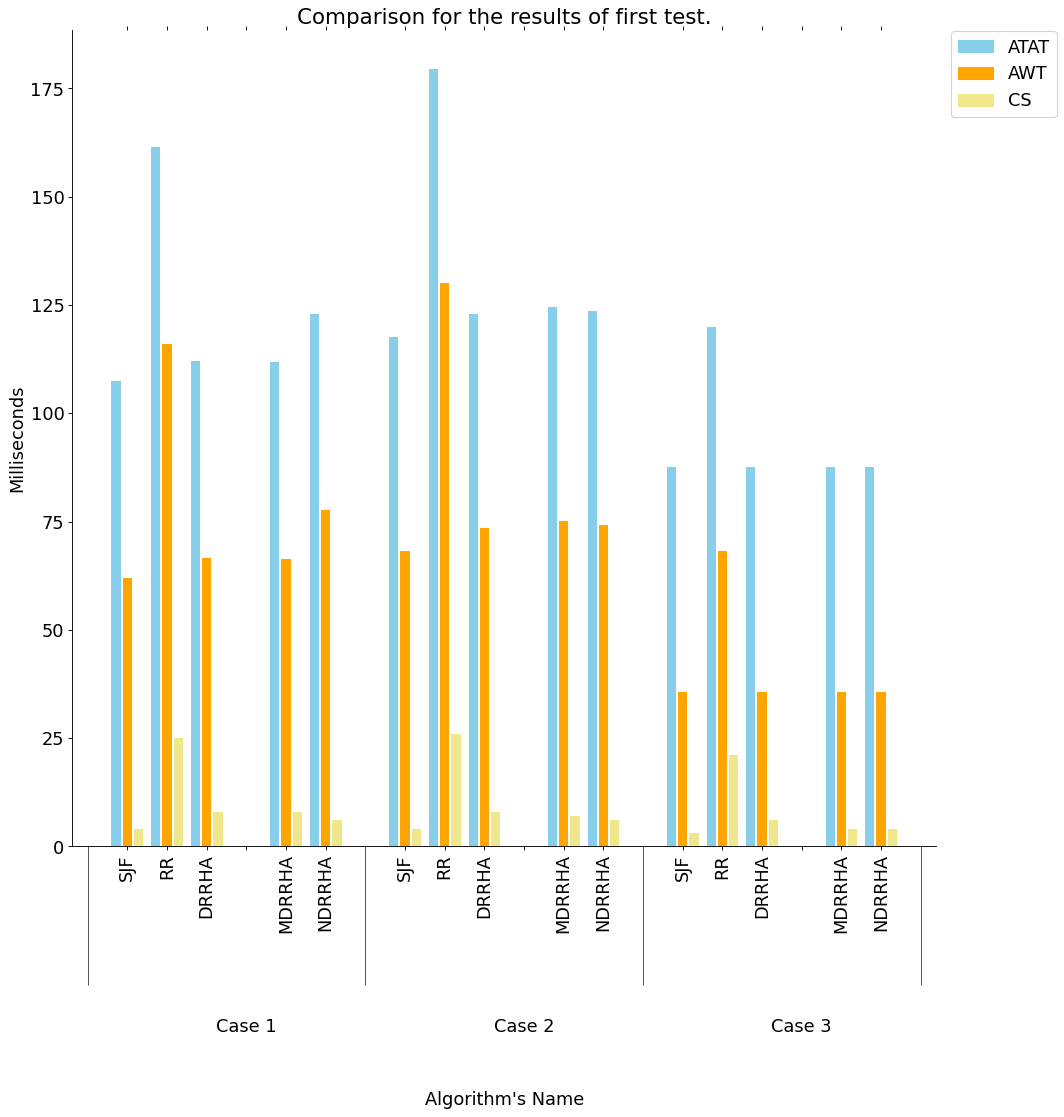

In [73]:
# Comparison of mDRRHA with SJF and FCFS

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_ATAT_BAR)
fig = plt.figure(figsize = (12, 12), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['name'].to_numpy()
X_labels = []
X_axis = []
X_axis_lines = [0]
X_axis_bars = []

current_case_index = 1
push_empty = False

counter_inc = 3
counter = counter_inc
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    X_axis_bars.append(counter)

    counter += counter_inc
    # if X[i] == 'HRRNHA':
    if X[i] == 'NDRRHA':
        X_axis_lines.append(counter)
        counter += counter_inc

    if X[i] == 'DRRHA':
        X_labels = np.append(X_labels, 'Case ' + str(current_case_index))
        current_case_index += 1
        X_axis.append(counter)
        counter += counter_inc

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# vertical alignment of xtick labels
minor_axis_padding_up = -0.2
vertical_align = []
for i in range(0, len(X_labels)):
    valueToPush = 0
    if X_labels[i].split()[0] == 'Case':
        valueToPush = minor_axis_padding_up      

    vertical_align.append(valueToPush)

# Adding Lines to xTicks
line_width = 0.025
line_height = 125

for i, (t, y) in enumerate(zip(ax.get_xticklabels(), vertical_align)):
    if t.get_text().split()[0] != 'Case':
        t.set_rotation(90)

    t.set_y(y)


ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

bar_width = 0.7
padding_betweenbars = 0.5

avgTAT_color = 'skyblue'
avgWT_color = 'orange'
avgRT_color = 'greenyellow'
nCS_color = 'khaki'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

avgTAT_values = dataset['avgTAT'].to_numpy()
avgWT_values = dataset['avgWT'].to_numpy()
# avgRT_values = dataset['avgRT'].to_numpy()
avgNCS_values = dataset['nCS'].to_numpy()

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis_bars):
    ax.bar(
        x_axis - bar_width / 2 - padding_betweenbars, 
        avgTAT_values[current_bar_index], 
        bar_width, 
        label = 'ATAT',
        color = avgTAT_color
    )

    ax.bar(
        x_axis, 
        avgWT_values[current_bar_index], 
        bar_width, 
        label = 'AWT',
        color = avgWT_color
    )

    # ax.bar(
    #     x_axis + 9 * padding_betweenbars, 
    #     avgRT_values[current_bar_index], 
    #     bar_width, 
    #     label = 'RT',
    #     color = avgRT_color
    # )

    ax.bar(
        x_axis + bar_width / 2 + padding_betweenbars, 
        avgNCS_values[current_bar_index], 
        bar_width, 
        label = 'CS',
        color = nCS_color
    )

    current_bar_index += 1

# Configuring Legend
legend_elements = [
    Patch(facecolor=avgTAT_color, edgecolor=avgTAT_color, label='ATAT'),
    Patch(facecolor=avgWT_color, edgecolor=avgWT_color, label='AWT'),
    # Patch(facecolor=avgRT_color, edgecolor=avgRT_color, label='ART'),
    Patch(facecolor=nCS_color, edgecolor=nCS_color, label='CS')
]

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.15, 1.01)
)

plt.xlabel('Algorithm\'s Name', labelpad = 50)
plt.ylabel('Milliseconds')
plt.title('Comparison for the results of first test.')
# plt.legend()
plt.show()

## Bar Graph Comparison for Large Datasets

In [61]:
# Import Data from CSV file
dataset = pd.read_csv(
    output_filename, 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

dataset = dataset.sort_values(by = ['#cases', 'name'])
dataset = dataset.loc[dataset['name'] != 'HRRNHA']
# print(dataset)


<Figure size 432x288 with 0 Axes>

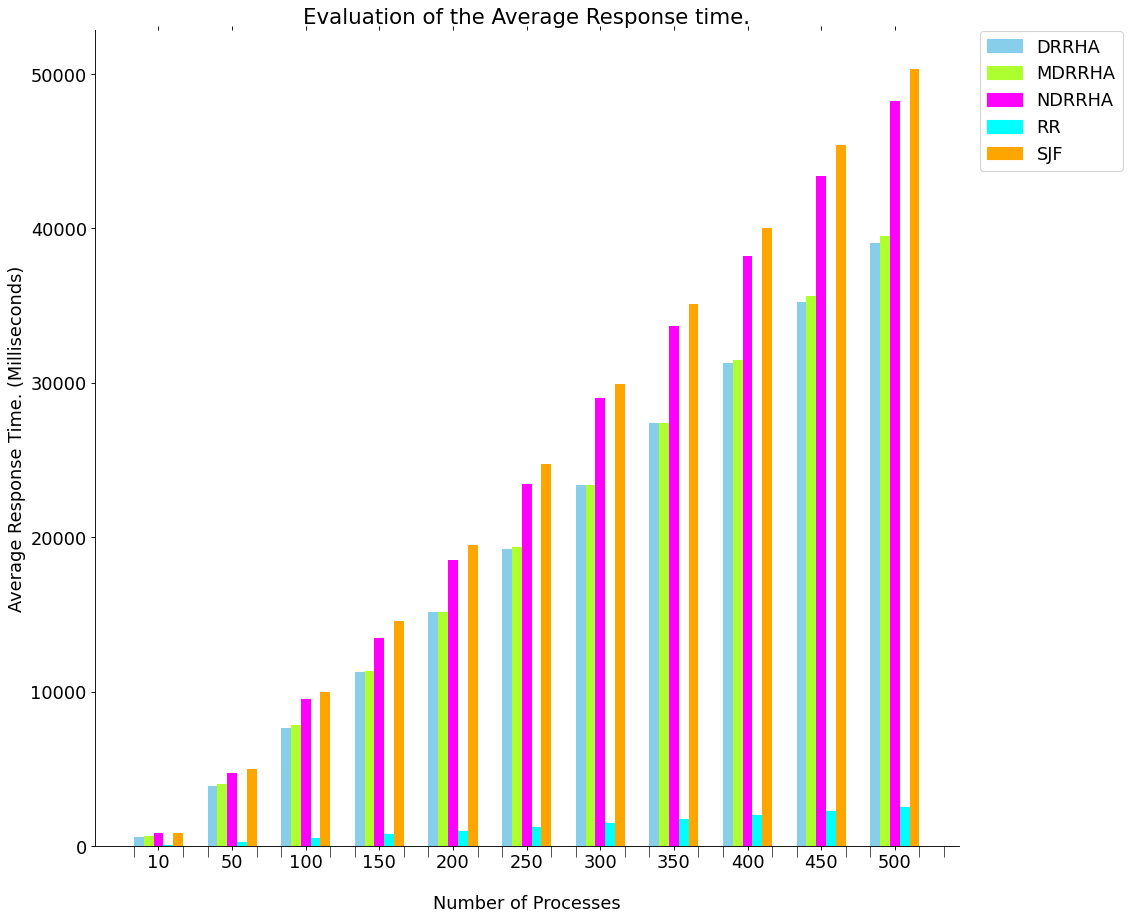

In [65]:
# Comparison of Algos Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_BAR)
fig = plt.figure(figsize = (12, 12), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter_inc = 1
counter = counter_inc
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += counter_inc

    X_axis_lines.append(counter)
    counter += counter_inc
    
    X_axis_lines.append(counter)
    counter += counter_inc

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params(axis = 'x', which = 'minor', direction = 'out', length = line_height)
ax.tick_params(axis = 'x', which = 'major', bottom = 'off', top = 'off')


bar_width = 0.40
paddings = [
    -2 * bar_width,
    -bar_width,
     0.0,
     bar_width,
     2 * bar_width,
    #  0.8
]

colors = [
    'skyblue', 'DRRHA',
    # 'khaki', 'HRRNHA',
    'greenyellow', 'MDRRHA',
    'fuchsia', 'NDRRHA',
    'aqua', 'RR',
    'orange', 'SJF',
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_value_index = 0
num_algos = len(dataset['name'].unique())

plot_metric = 'avgRT'
# plot_metric = 'avgWT'
# plot_metric = 'avgTAT'

average_WT_values = dataset[plot_metric].to_numpy()     # To Plot Average Waiting Times
# average_WT_values = dataset['avgWT'].to_numpy()     # To Plot Average Waiting Times
# average_WT_values = dataset['avgTAT'].to_numpy()       # To Plot Average Turn around times


for index, x_axis in enumerate(X_axis):
    for i in range(0, num_algos):
        ax.bar(
            x_axis + paddings[i], 
            average_WT_values[current_value_index], 
            bar_width, 
            color = colors[2 * i]
        )

        current_value_index += 1

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Processes', labelpad = 20)

# plt.ylabel(plot_metric)
# plt.ylabel('Average Waiting Time. (Milliseconds)')
plt.ylabel('Average Response Time. (Milliseconds)')
# plt.ylabel('Average Turnaround Time. (Milliseconds)')

# plt.title('Evaluation of the Average Waiting time.')
plt.title('Evaluation of the Average Response time.')
# plt.title('Evaluation of the Average Turnaround time.')

plt.show()


## Line Graph Comparison for Large Datasets

In [94]:
# Import Data from CSV file
dataset = pd.read_csv(
    output_filename, 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

# dataset = dataset.loc[dataset['name'].isin(['SJF', 'DRRHA'])]

sjf_values = dataset.loc[dataset['name'] == 'SJF']
drrha_values = dataset.loc[dataset['name'] == 'DRRHA']
mdrrha_values = dataset.loc[dataset['name'] == 'MDRRHA']
ndrrha_values = dataset.loc[dataset['name'] == 'NDRRHA']
# hrrnha_values = dataset.loc[dataset['name'] == 'HRRNHA']

dataset = dataset.sort_values(by = ['#cases', 'name'])


<Figure size 432x288 with 0 Axes>

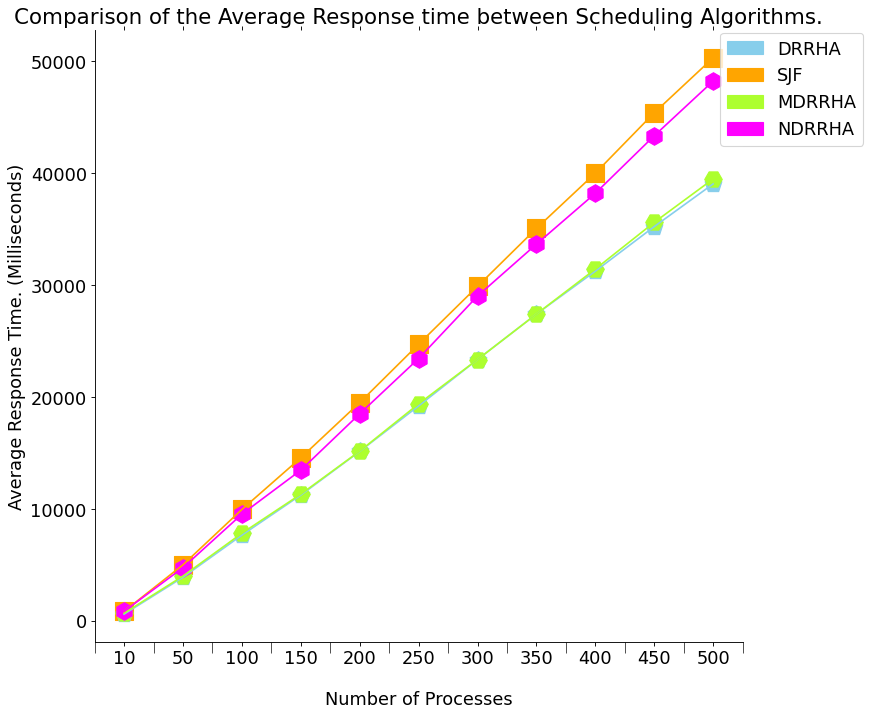

In [98]:
# Line Graph Comparison of DRRHA and STF Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_LINE)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

colors = [
    'skyblue', 'DRRHA',
    'orange', 'SJF',
    'greenyellow', 'MDRRHA',
    'fuchsia', 'NDRRHA',
    # 'khaki', 'HRRNHA'
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
marker_size = 250

# plot_metric = 'avgWT'
# plot_metric = 'avgTAT'
plot_metric = 'avgRT'

ax.plot(X_axis, sjf_values[plot_metric].to_numpy(), color = colors[2])
plt.scatter(X_axis, sjf_values[plot_metric].to_numpy(), marker = 's', s = marker_size, color = colors[2])

ax.plot(X_axis, drrha_values[plot_metric].to_numpy(), color = colors[0])
plt.scatter(X_axis, drrha_values[plot_metric].to_numpy(), marker = 'p', s = marker_size, color = colors[0])

ax.plot(X_axis, mdrrha_values[plot_metric].to_numpy(), color = colors[4])
plt.scatter(X_axis, mdrrha_values[plot_metric].to_numpy(), marker = 'H', s = marker_size, color = colors[4])

ax.plot(X_axis, ndrrha_values[plot_metric].to_numpy(), color = colors[6])
plt.scatter(X_axis, ndrrha_values[plot_metric].to_numpy(), marker = 'h', s = marker_size, color = colors[6])

# ax.plot(X_axis, hrrnha_values[plot_metric].to_numpy(), color = colors[8])
# plt.scatter(X_axis, hrrnha_values[plot_metric].to_numpy(), marker = 'D', s = marker_size, color = colors[8])

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Processes', labelpad = 20)
plt.ylabel(plot_metric)
# plt.ylabel('Average Waiting Time. (Milliseconds)')
# plt.ylabel('Average Turnaround Time. (Milliseconds)')
plt.ylabel('Average Response Time. (Milliseconds)')
# plt.ylabel(plot_metric)

# plt.title('Comparison of the Average Waiting time between Scheduling Algorithms.')
# plt.title('Comparison of the Average Turnaround time between Scheduling Algorithms.')
plt.title('Comparison of the Average Response time between Scheduling Algorithms.')
plt.show()

In [ ]:
# Kaggle 1 - 500
# RT | SJF > NDRRHA / HRRNA > MDRRHA / DRRHA
# TAT | MDRRHA / DRRHA > NDRRHA / HRRNA > SJF

# Kaggle 2 - 1500
# RT | SJF > NDRRHA / HRRNA > MDRRHA / DRRHA
# TAT | MDRRHA / DRRHA > NDRRHA / HRRNA > SJF

# Random - 500
# RT | SJF > NDRRHA / HRRNA > MDRRHA / DRRHA
# TAT | MDRRHA / DRRHA > NDRRHA / HRRNA > SJF